/var/folders/hj/sn71kqzs57x2snf3yz30cg1w0000gn/T/ipykernel_81472/63353082.py:85: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "0". Passing invalid values is deprecated since 3.4 and will become an error in 3.9.
  ax.fill_between(


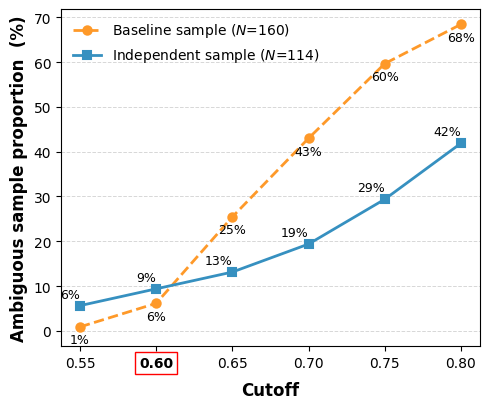

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取第一个Excel文件
df1 = pd.read_excel(
    '/Users/zhangtongyi/Desktop/P0022024-认知聚类-project(最新版）/'
    'A.最新版本/2.主结果/2.重复验证-聚类分析/'
    '5.模糊阈值确定重复验证/FCM与GMM.xlsx',
    sheet_name='Sheet1'
)

# 读取第二个Excel文件
df2 = pd.read_excel('FCM与GMM.xlsx', sheet_name='Sheet1')

# 定义阈值范围
thresholds = np.arange(0.55, 0.85, 0.05)

# 创建空的DataFrame来存储结果
results_df1 = pd.DataFrame(columns=['Threshold', 'Mixed_Count', 'Mixed_Ratio'])
results_df2 = pd.DataFrame(columns=['Threshold', 'Mixed_Count', 'Mixed_Ratio'])

# 计算第一个数据集的 Mixed Ratio
for threshold in thresholds:
    df1['Cluster0'] = df1['FCM_Cluster0'] >= threshold
    df1['Cluster1'] = df1['FCM_Cluster1'] >= threshold
    df1['Mixed']    = ~(df1['Cluster0'] | df1['Cluster1'])

    mixed_count = df1['Mixed'].sum()
    mixed_ratio = mixed_count / len(df1)

    results_df1 = pd.concat([
        results_df1,
        pd.DataFrame({
            'Threshold':   [threshold],
            'Mixed_Count': [mixed_count],
            'Mixed_Ratio': [mixed_ratio]
        })
    ], ignore_index=True)

# 计算第二个数据集的 Mixed Ratio
for threshold in thresholds:
    df2['Cluster0'] = df2['FCM_Cluster0'] >= threshold
    df2['Cluster1'] = df2['FCM_Cluster1'] >= threshold
    df2['Mixed']    = ~(df2['Cluster0'] | df2['Cluster1'])

    mixed_count = df2['Mixed'].sum()
    mixed_ratio = mixed_count / len(df2)

    results_df2 = pd.concat([
        results_df2,
        pd.DataFrame({
            'Threshold':   [threshold],
            'Mixed_Count': [mixed_count],
            'Mixed_Ratio': [mixed_ratio]
        })
    ], ignore_index=True)

# 创建面积图
fig, ax = plt.subplots(figsize=(5, 4.2))

# 颜色和样式设置
color1_line = '#fe9929'  # 橙色线条
marker1     = 'o'        # 橙色样本标记
color2_line = '#3690c0'  # 蓝色线条
marker2     = 's'        # 蓝色样本标记

# draw only the hatch (no legend) to show pattern, but don't label it
ax.fill_between(
    thresholds,
    results_df1['Mixed_Ratio'] * 100,
    color='none', alpha=0.0, hatch='//'
)
# plot the Baseline line+marker with label
ax.plot(
    thresholds,
    results_df1['Mixed_Ratio'] * 100,
    color=color1_line, linestyle='--',
    linewidth=2, marker=marker1, markersize=6,
    markeredgewidth=1.5,
    label='Baseline sample ($N$=160)'
)

# draw hatch for independent (no legend)
ax.fill_between(
    thresholds,
    results_df2['Mixed_Ratio'] * 100,
    color='none', alpha=0.0, hatch='0'
)
# plot the Independent line+marker with label
ax.plot(
    thresholds,
    results_df2['Mixed_Ratio'] * 100,
    color=color2_line, linestyle='-',
    linewidth=2, marker=marker2, markersize=6,
    markeredgewidth=1.5,
    label='Independent sample ($N$=114)'
)

# 添加百分比文本
for i, thr in enumerate(thresholds):
    ax.text(
        thr,
        results_df1['Mixed_Ratio'][i] * 100 - 3.7,
        f'{results_df1["Mixed_Ratio"][i] * 100:.0f}%',
        ha='center', va='baseline',
        fontsize=9, color='black'
    )
    ax.text(
        thr,
        results_df2['Mixed_Ratio'][i] * 100 + 1.8,
        f'{results_df2["Mixed_Ratio"][i] * 100:.0f}%',
        ha='right', va='baseline',
        fontsize=9, color='black'
    )

# 设置坐标轴标签
ax.set_xlabel('Cutoff', fontsize=12, fontweight='bold', labelpad=8)
ax.set_ylabel('Ambiguous sample proportion  (%)', fontsize=12, fontweight='bold')

# 明确 X 轴刻度并突出 0.60
ax.set_xticks(thresholds)
ax.set_xticklabels([f"{thr:.2f}" for thr in thresholds], fontsize=10)
for label in ax.get_xticklabels():
    if label.get_text() == "0.60":
        label.set_fontweight('bold')
        label.set_bbox(dict(facecolor='none', edgecolor='red', boxstyle='square,pad=0.3'))

# 添加仅有线条+标记的图例
ax.legend(
    fontsize=10,
    frameon=False,
    loc='upper left',
    bbox_to_anchor=(0, 1)
)

# 优化网格与布局
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.5)
plt.tight_layout()

# 保存并展示
plt.savefig(
    './image/FCM_kmeans_Mixed_Ratio_LineMarker_Legend.jpg',
    dpi=1200, bbox_inches='tight'
)
plt.show()